Saving upload.jpg to upload (1).jpg


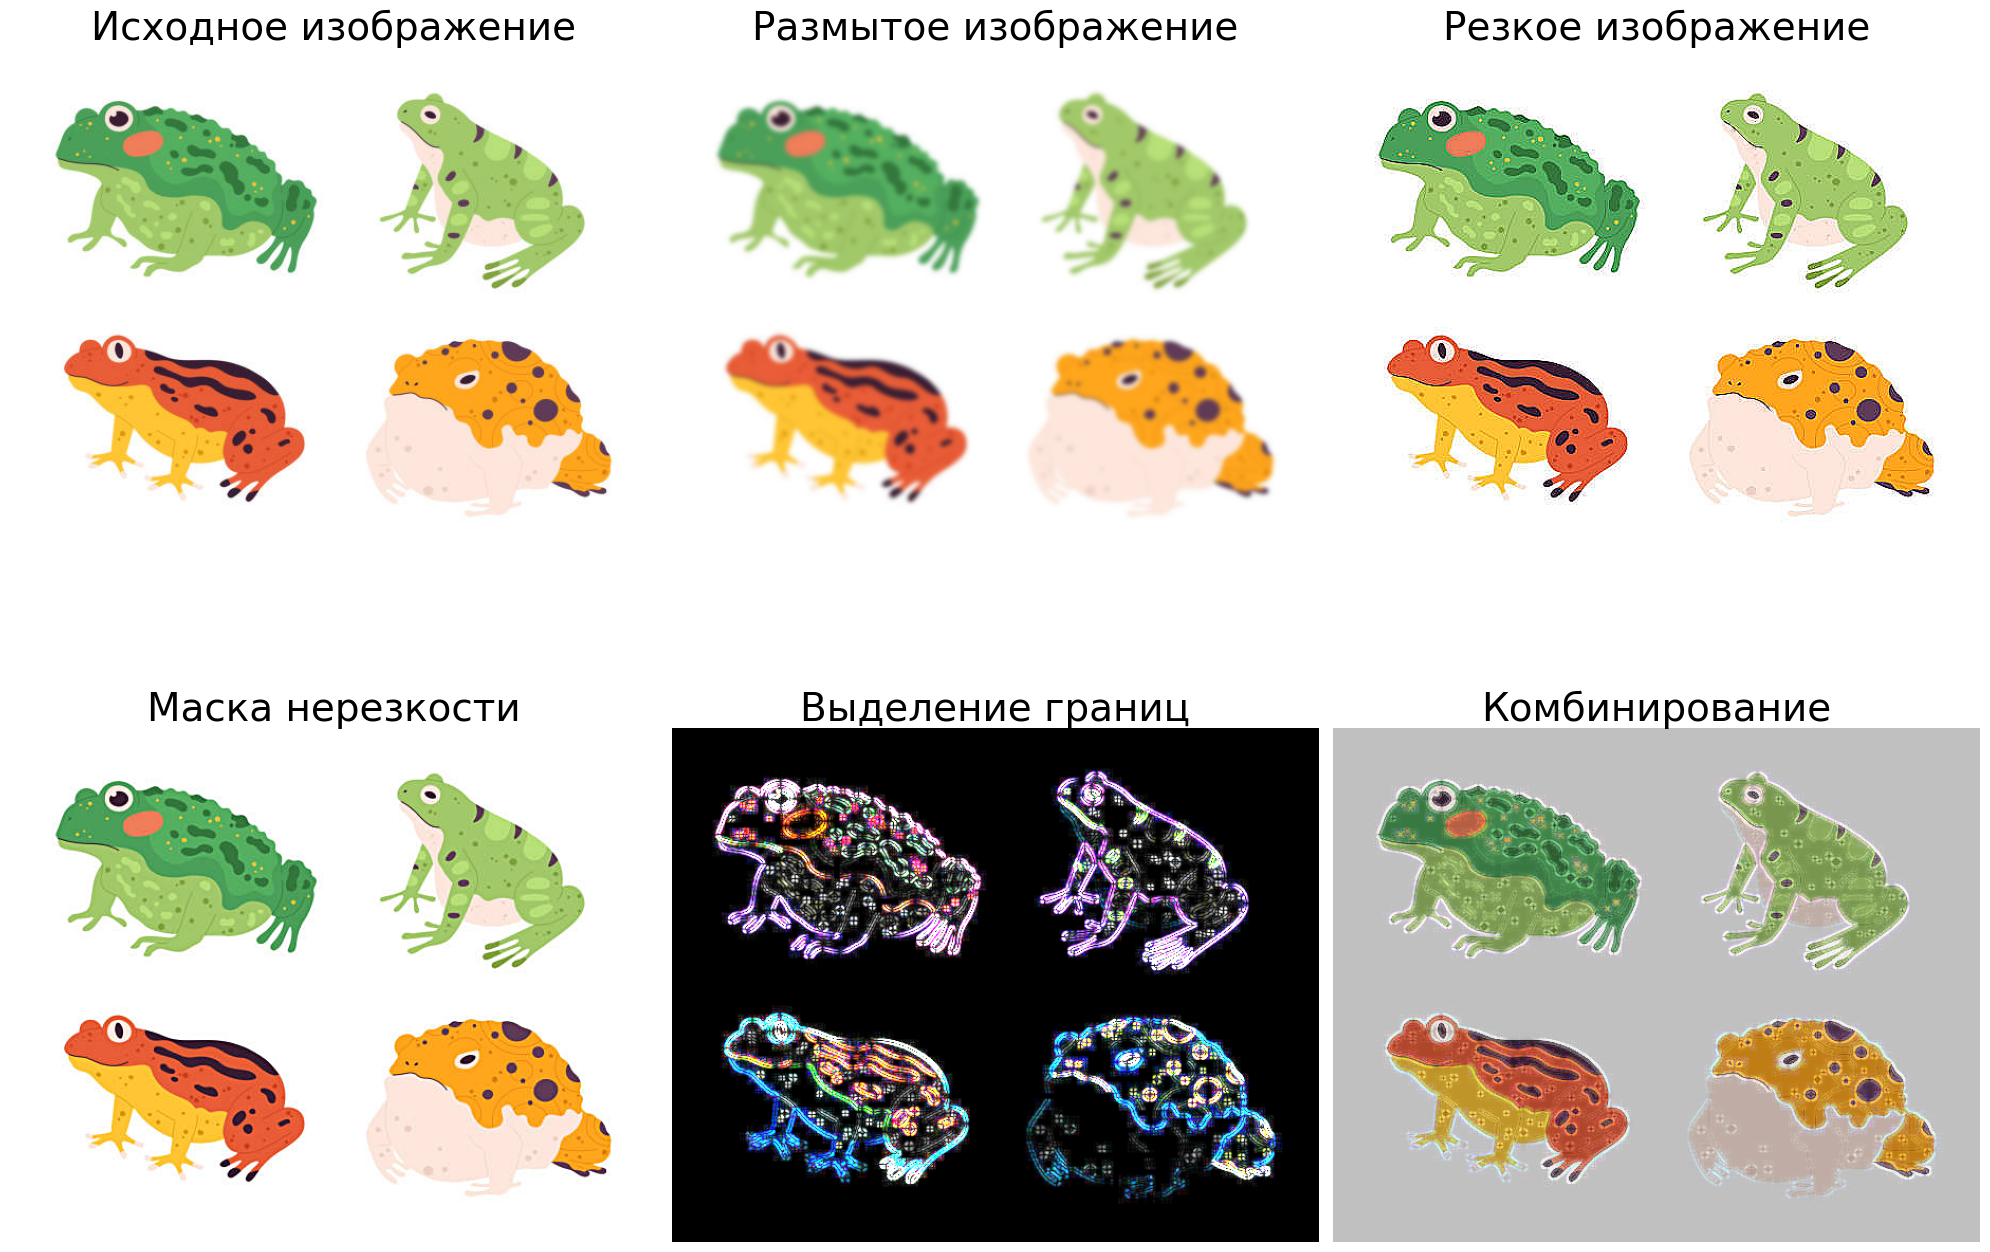

In [2]:
import cv2
import matplotlib.pyplot as plt
from google.colab import files
import numpy as np

# Функция для загрузки изображения
uploaded = files.upload()

# Получаем имя загруженного файла
image_path = next(iter(uploaded))

# Читаем загруженное изображение
image = cv2.imread(image_path)

# Преобразуем изображение из BGR (формат OpenCV) в RGB (формат для Matplotlib)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Размытие картинки
blurred_image = cv2.GaussianBlur(image_rgb, (11, 11), 0)

# Повышение резкости
kernel = np.array([[0, -1, 0],
                    [-1, 5, -1],
                    [0, -1, 0]])
sharpened = cv2.filter2D(image_rgb, -1, kernel)

# Маска нерезкости
sharpened_2 = cv2.addWeighted(image_rgb, 1.5, blurred_image, -0.5, 0)

# Выделение границ с помощью фильтра Собеля
edges = cv2.Sobel(image_rgb,  cv2.CV_64F, 1, 1, ksize=5)
edges = cv2.convertScaleAbs(edges)

# Комбинирование
combined = cv2.addWeighted(blurred_image, 0.5, edges, 0.5, 0)
combined = cv2.addWeighted(combined, 0.5, sharpened, 0.5, 0)

# Отображение изображений
plt.figure(figsize=(20, 15))

# Исходное изображение
plt.subplot(2, 3, 1)
plt.imshow(image_rgb)
plt.title('Исходное изображение', fontsize=28)
plt.axis('off')

# Размытое изображение
plt.subplot(2, 3, 2)
plt.imshow(blurred_image, cmap='gray')
plt.title('Размытое изображение', fontsize=28)
plt.axis('off')

# Резкое изображение
plt.subplot(2, 3, 3)
plt.imshow(sharpened, cmap='gray')
plt.title('Резкое изображение', fontsize=28)
plt.axis('off')

# Маска нерезкости
plt.subplot(2, 3, 4)
plt.imshow(sharpened_2, cmap='gray')
plt.title('Маска нерезкости', fontsize=28)
plt.axis('off')

# Маска нерезкости
plt.subplot(2, 3, 5)
plt.imshow(edges, cmap='gray')
plt.title('Выделение границ', fontsize=28)
plt.axis('off')

# Комбинирование
plt.subplot(2, 3, 6)
plt.imshow(combined, cmap='gray')
plt.title('Комбинирование', fontsize=28)
plt.axis('off')

# Показать все изображения
plt.tight_layout()
plt.show()
